a.) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import ISLP
from statsmodels.graphics.gofplots import qqplot

In [2]:
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize , poly)

#need ISLP package 

In [10]:
Auto = pd.read_csv("~/Independent Study /Auto.csv") 
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [15]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [36]:
# Remove missing values
Auto = Auto.drop(Auto[Auto.values == '?'].index)
Auto = Auto.reset_index()
Auto.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [37]:
# Convert quantitive datatypes to numerics
datatypes = {'quant': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'],
             'qual': ['origin', 'name']}

quants = Auto[datatypes['quant']].astype(np.float_)

Auto = pd.concat([quants, Auto[datatypes['qual']]], axis=1) 

In [39]:
X = Auto['horsepower']
y = Auto['mpg']

In [40]:
# Convert horsepower to numeric, handling errors by coercing them to NaN and then dropping them
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'], errors='coerce')
Auto = Auto.dropna(subset=['horsepower', 'mpg'])

In [42]:
X = sm.add_constant(X)

In [43]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           7.03e-81
Time:                        11:08:25   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

i. Is there a relationship between the predictor and the re- sponse?

ii. How strong is the relationship between the predictor and the response?

iii. Is the relationship between the predictor and the response positive or negative?

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?


In [44]:
predicted = model.get_prediction([1, 98]).summary_frame(alpha=0.05)
print(predicted)


        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


b.) Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

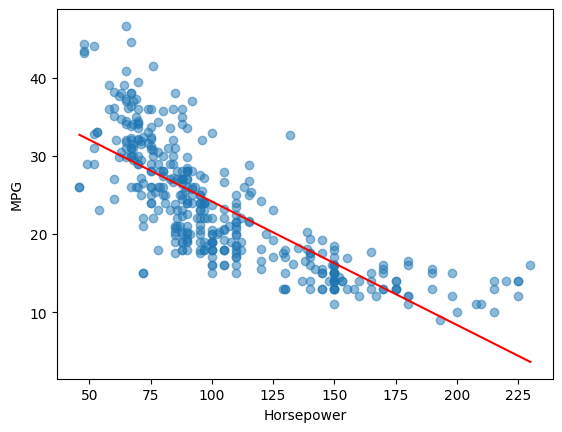

In [49]:
fig, ax = plt.subplots()

# Create the Scatter plot
ax.scatter(Auto['horsepower'], Auto['mpg'], alpha=0.5)

# Now lets create the regression line
x_vals = np.linspace(Auto['horsepower'].min(), Auto['horsepower'].max())
y_vals = model.params[0] + model.params[1] * x_vals
ax.plot(x_vals, y_vals, color='red')

ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
plt.show()

c.) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

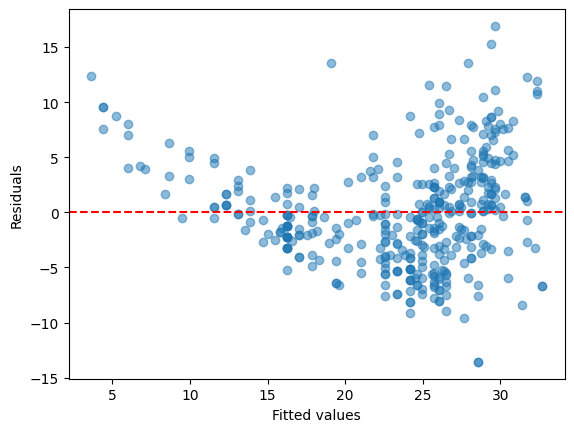

In [50]:
fig, ax = plt.subplots()
ax.scatter(model.fittedvalues, model.resid, alpha=0.5)
ax.axhline(0, color='red', linestyle='--')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
plt.show()


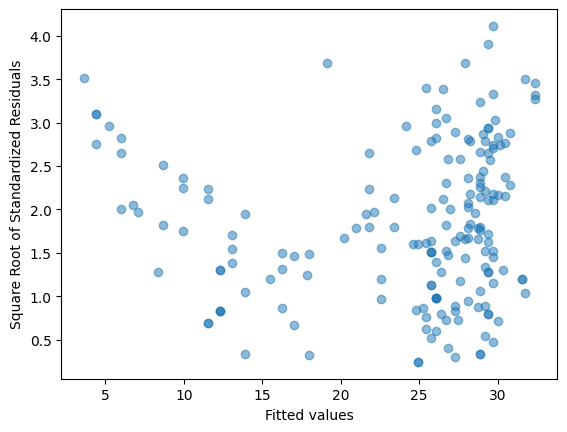

In [56]:
fig, ax = plt.subplots()
ax.scatter(model.fittedvalues, model.resid**0.5, alpha=0.5)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Square Root of Standardized Residuals')
plt.show()


* There seems to be some patterns of curves which suggests non-linearity
* In the plots above the residuals appear to deviate from a straight linear line, which might suggest the Auto dataset is not normally distributed
* 
